In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.shape

(768, 9)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     Pedigree  Age  Outcome  
0       0.627   50        1  
1       0.351   3

In [12]:
# input data 
x= df.drop('Outcome',axis =1)

#output data

y= df['Outcome']

<Axes: xlabel='Outcome', ylabel='count'>

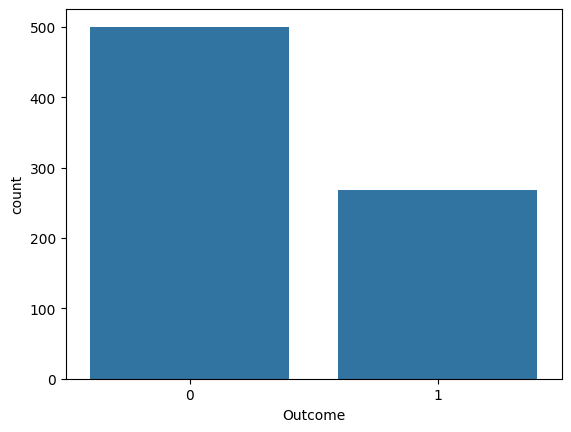

In [13]:
sns.countplot(x=y)

In [15]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [16]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [17]:
#cross validaton

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y, random_state =0, test_size=0.25)

In [19]:
x_scaled.shape

(768, 8)

In [20]:
x_train.shape

(576, 8)

In [21]:
x_test.shape

(192, 8)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)

In [24]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [27]:
y_pred = knn.predict(x_test)

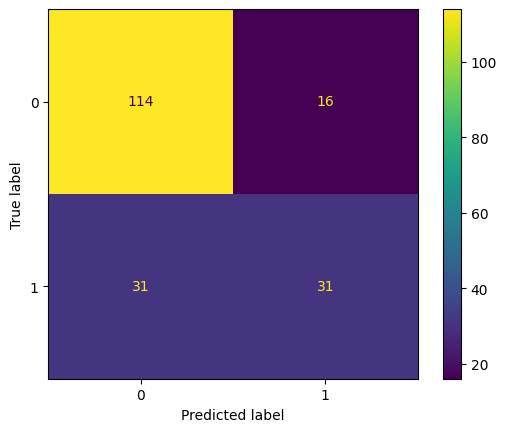

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       130
           1       0.66      0.50      0.57        62

    accuracy                           0.76       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192



In [33]:
import matplotlib.pyplot as plt 
import numpy as np

In [34]:
error =[]
for k in range (1,41):
    knn=KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train , y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred !=y_test))

In [35]:
error

[0.328125,
 0.2708333333333333,
 0.24479166666666666,
 0.2708333333333333,
 0.24479166666666666,
 0.2552083333333333,
 0.234375,
 0.24479166666666666,
 0.21875,
 0.24479166666666666,
 0.22916666666666666,
 0.22916666666666666,
 0.22395833333333334,
 0.234375,
 0.23958333333333334,
 0.21875,
 0.21354166666666666,
 0.22916666666666666,
 0.22916666666666666,
 0.22395833333333334,
 0.21875,
 0.22395833333333334,
 0.22395833333333334,
 0.22916666666666666,
 0.234375,
 0.22916666666666666,
 0.22395833333333334,
 0.21875,
 0.22395833333333334,
 0.21354166666666666,
 0.22395833333333334,
 0.22916666666666666,
 0.20833333333333334,
 0.22916666666666666,
 0.22916666666666666,
 0.234375,
 0.22395833333333334,
 0.22916666666666666,
 0.22395833333333334,
 0.22395833333333334]

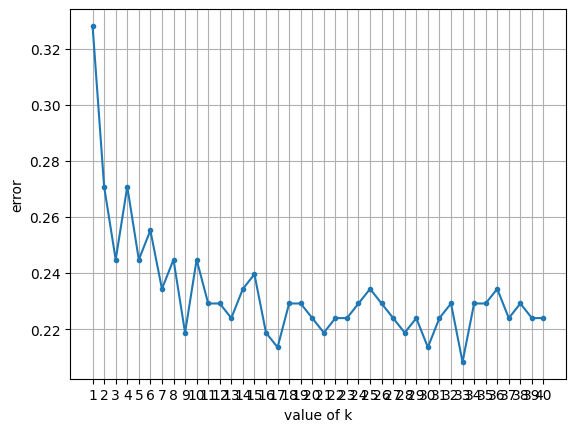

In [37]:
plt.xlabel('value of k')
plt.ylabel('error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41),error, marker='.')

In [39]:
knn = KNeighborsClassifier(n_neighbors = 33)

In [40]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=33)

In [41]:
KNeighborsClassifier(n_neighbors=33)

KNeighborsClassifier(n_neighbors=33)

In [42]:
y_pred =knn.predict(x_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       130
           1       0.79      0.48      0.60        62

    accuracy                           0.79       192
   macro avg       0.79      0.71      0.73       192
weighted avg       0.79      0.79      0.78       192

